# Convolutional Neural Network
## Multi-classification with the MNIST Data
### Jade Gee
---
---

## Introduction

A convolutional neural network (also called a convnet or CNN) is a class of deep neural networks that is commonly used computer-vision application for the purpose of recognizing objects in images and video or, in the case of this notebook, handwritten digits and characters. Due to the fact that CNNs have a shared-weights architecture and translation invariance characteristics, they are also known as Shift/Space Invariant Neural Networks (SIANN). 

### Applications

These networks can be used in various ways, such as:

+ image and video recognition

+ recommendation systems

+ image classification

+ natural language processing

+ financial time series, or

+ medical image analysis

Convnets are essentially normalized versions of multi-layered perceptrons which usually means a fully connected network--each neuron in a single layer is connected to all neurons in the subsequent layer. However, the issue with this concept is that the connectivity associated with a fully connected network make them more prone to overfitting the data. As such, CNNs compensate by taking advantage of the hierarchical pattern in the data and taking the smaller, more simple patterns to build the complex patterns which puts these types of networks on a lower extreme in terms of connectivity and complexity.

Like its flaws though, there are upsides to using a Convnet compared to other image classification algorithms. Due to a convnet's use of a substantially smaller amount of pre-processing, it can learn the filters that most other algorithms require to be engineered--using data mining techniques to extract the features from the raw data sets; and, as a result, the convnet's independence from necessitating prior knowledge and human effort in feature design put it at an advantage.

### How does it work?

As with a multilayer perceptron (MLP), convolutional neural networks have an input layer, multiple hidden layers, and an output layer. Unlike most MLPs, the CNN's hidden layers comprise of a series of convolutional layers that convolve using multiplication or dot product. They also use a ReLU layer as an activation function which is then followed by additional convolutional layers such as pooling, fully connected, and normalization layers.

![cnn](cnn_diagram.png)

As the image above depicts, when we are building a CNN, we take an input layer of $n \times h \times w \times d$, where $n$: number of images, $h$: image height, $w$: image width, and $d$: the image depth. Then it is passed through a convolutional layer which manipulates the image into an abstract feature map with a shape of $n \times h_{fm} \times w_{fm} \times c$, where $h_{fm}$ denotes the height of the feature map, $w_{fm}$, the width of the feature map, and $c$, the number of feature map channels.
The attributes needed for the convolutional layer are:
+ Hyper-parameters:
    - Convolutional kernels defined by width and height
    - Number of input and output channels
+ Depth of the convolutional filter (the input channels) must equal the number of channels (depth) of the input feature map

While in the convolution layer, the input is convolved and its results passed to the next layer--the pooling layer. In the pooling layer, CNNs streamline the underlying computations by reducing the dimensionality of the data in the combination of outputs of neuron clusters at one layer into a single neuron in the next. Pooling can be done by calculating the mean or maximum value from each of a cluster of neurons. Depending on the CNN, multiple convolutional and pooling layers may be added; and for the purpose of this notebook, we will include three convolutional and three pooling layers that utilize maximum pooling.

At the conclusion of the above mention process, our data is then flattened into a matrix and passed through a fully connected layer for classification. The fully connected layer, each neuron gets input from all of the elements in the previous layer; and, the network computes an output value by apply a function to the input values received from the fully connected layer while making iterative adjustments to the weights and biases (or filters).

So, now that we know what a Convolutional Neural Network is, we will now build one using the MNIST Dataset which provides a higher resolution of hand-written digits.

---

## Data Manipulation
### Import Packages

To build the network we will need to import the following packages:

+ `tensorflow.keras`
    -`datasets`: to access the MNIST data set
    - `utils`: to access the functions `to_categorical` and `plot_model`
        + Allows us to perform one-hot coding--counts the unique categories then for each item creates an array of that length with a 1.0 in the right position
        + Allows us to store the visualization of our CNN model after `Keras` assigns the layer names in the image
    - `models`: to access the `Sequential` model
        + This executes our layers sequentially--output of one layer becomes the input for the next.
    - `layers`: to access the functions `Conv2D`, `Dense`, `Flatten`, and `MaxPooling2D`
        + Allows us to add our convolutional layers, pooling layers, dense layer, and flatten the data.

+ `IPython.display`
    - `Image`: to show the image in the notebook
    
+ `matplotlib.pyplot`: for plotting our data

+ `numpy.random`: to get the function `choice`
    - to select a random number of elements from the data set for display
    
+ `numpy`: to get the functions `arange` and `argmax
    - to select a range of values
    - to select the maximum argument

In [51]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from IPython.display import Image
import matplotlib.pyplot as plt
from numpy.random import choice
from numpy import arange, argmax

%matplotlib inline

ImportError: cannot import name 'choices' from 'numpy.random' (C:\Users\ggeew\anaconda3\lib\site-packages\numpy\random\__init__.py)

With our packages now imported, we can gather our data.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

---
### Exploring our Data

In [3]:
print("Shape of X train: ", X_train.shape)
print("Shape of y train: ", y_train.shape)
print("Shape of X test: ", X_test.shape)
print("Shape of y test: ", y_test.shape)

Shape of X train:  (60000, 28, 28)
Shape of y train:  (60000,)
Shape of X test:  (10000, 28, 28)
Shape of y test:  (10000,)


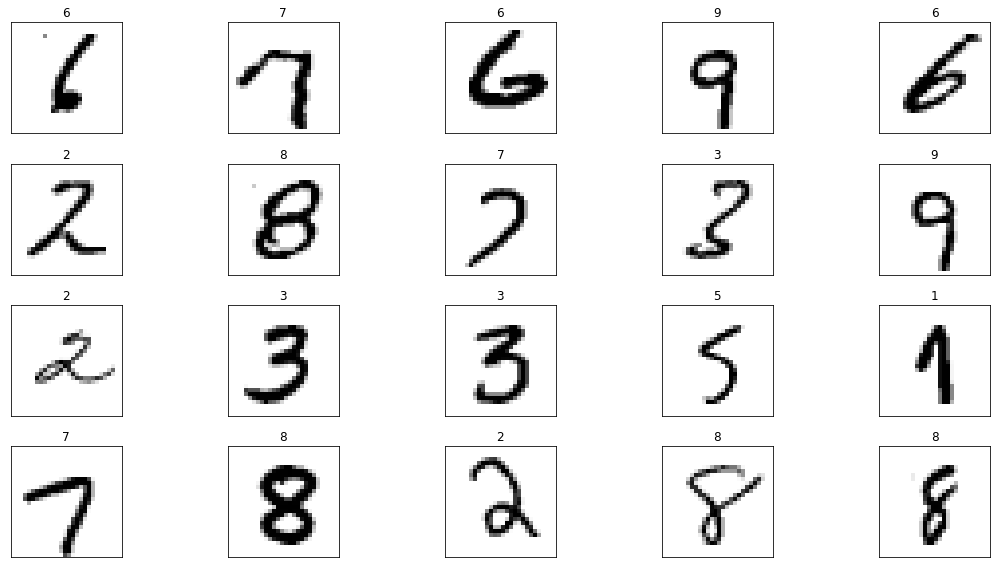

In [4]:
# Display a randomly selected set of MNIST training images
index = choice(arange(len(X_train)), 20, replace=False)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16,8))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # removes x ticks
    axes.set_yticks([]) # removes y ticks
    axes.set_title(target)
plt.tight_layout()

As you can see from the above sample images of the data, we can see why handwritten digit recognition can be difficult. People write in multitudes of ways, so we can see how each of the duplicated numbers retain some general similarities; but all are different.

---

### Prepare our Data

First, we will need to reshape the training and test data for `X`. Once this is completed, we will normalize the data and covert the labels of the data, `y_train` and `y_test`, from integers to categorical values. All of this will be completed in the following code cell.

In [5]:
# Reshape the training and test data
X_train = X_train.reshape((60000, 28, 28, 1))
print("Shape of X train: ", X_train.shape)

X_test = X_test.reshape((10000, 28, 28, 1))
print("Shape of X test: ", X_test.shape)

# Image Data Normalization
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# Categorical Conversion
y_train = to_categorical(y_train)
print("Shape of y_train: ", y_train.shape)

y_test = to_categorical(y_test)
print("Shape of y_test: ", y_test.shape)

## The following code is commented out for the 
## purpose of length conservation
#print(y_train[0])
#print(y_test[0])

Shape of X train:  (60000, 28, 28, 1)
Shape of X test:  (10000, 28, 28, 1)
Shape of y_train:  (60000, 10)
Shape of y_test:  (10000, 10)


---
## Build the Neural Network

With our data prepared, we can now configure our convolutional neural network (CNN) by utilizing the Keras `Sequential` model from the `tensorflow.keras.models` package that we imported in the beginning.

In [6]:
CNN = Sequential()

### Add a Convolutional Layer
Convolutional Neural Networks, or CNN, are comprised of several layers:

+ *input layer*: where training samples are received
+ *hidden layers*: where the learning from the samples occurs; and
+ *output layer*: where probability predictions are produced

For the purpose of this notebook, we are going to build a basic CNN here. To do this, we will add a `Conv2D` convolutional layer to our model.

In [7]:
# filters=64: represents the number of dimensions (or filters) in the feature set
# kernel_size=(3, 3): the kernel size used in each filter
# activation='relu': represents the Rectified Linear Unit activation function which
# is used to produce the layer's output; most used activation function
# input_shape =(28,28,1): specifies the shape of each of the samples
CNN.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

---
### Add a Pooling Layer

The pooling layer is added in order to reduce over-fitting and computation time because they reduce the dimensionality of the output of the convolutional layer. It compresses the results by discarding features to help in making the model more general, and the most common technique to implement this pooling layer is **max pooling**. Since max pooling is most commonly used, this is the technique we will be using for our pooling layer.

In [8]:
CNN.add(MaxPooling2D(pool_size=(2,2)))

---
### Add Additional Layers and Flattening the Results

As most CNNs have many convolution and pooling layers, so we will add two additional convolutional layers and two additional pooling layer.
Once these layers have been added, we can flatten the previous layer's three-dimensional output into a one-dimensional array of 10 probabilities which classify the digits. All of this we be completed in the next code cell.

In [9]:
CNN.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Flatten())

---
## Add Multiple Dense Layers

Since the layers prior to flattening learned the features of the digits in the MNIST data set, we have to take those features and learn the similarities (or relationships) among those features to perform the classifications that the Dense layers complete. 

To add the Dense Layers we will first utilize the `relu` activation function that we used when we added the convolutional layer for the initial Dense layer. We will then use the `softmax` activation function in the second layer because it will convert the remaining ten neurons' values to the classification probabilities that we are seeking. These will be done below.

In [10]:
CNN.add(Dense(units=128, activation='relu'))
CNN.add(Dense(units=10, activation='softmax'))

---
### Summary

With our model built, we will print a summary of our Convolutional Neural Network.

In [11]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

---
### Model Structure Visualization

For better visualization, we will plot the model summary in a diagram as follows:

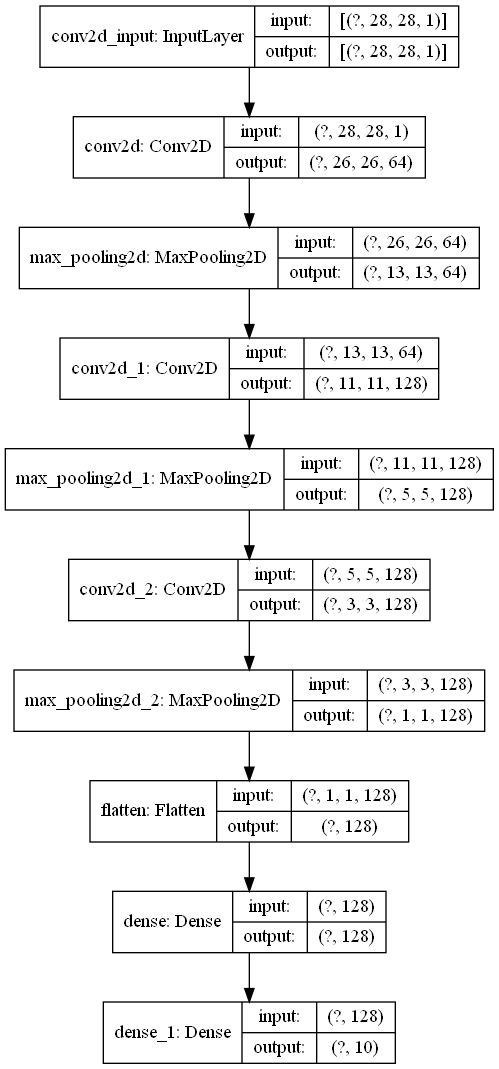

In [12]:
plot_model(CNN, to_file='CNN.png', show_shapes=True, show_layer_names=True)

Image(filename='CNN.png')

---
## Compile the Model

Now it is time to complete the model, so that we can train and evaluate it. 
We will be using the `adam` optimizer to adjust the weights throughout the network, the `categorical_crossentropy`method for the loss function, and `accuracy` metrics to check the percentage of successful predictions.

In [13]:
CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training & Evaluation

For the sake of time and the fact that we have three convolutional layers and three pooling layers, this notbook will only run two epochs (iterations).

In [14]:
#Training
CNN.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.1)

Epoch 1/2
844/844 [==============================] - 189s 223ms/step - loss: 0.2244 - accuracy: 0.9296 - val_loss: 0.0679 - val_accuracy: 0.9800
Epoch 2/2
844/844 [==============================] - 184s 217ms/step - loss: 0.0711 - accuracy: 0.9782 - val_loss: 0.0708 - val_accuracy: 0.9777


### Predictions

In [15]:
# Evaluation
loss, accuracy = CNN.evaluate(X_test, y_test)
print("Categorical Cross Entropy Loss: ", loss)
print("Accuracy:\t\t", accuracy)

313/313 [==============================] - 13s 41ms/step - loss: 0.0836 - accuracy: 0.9742
Cross Entropy Loss:  0.08358590304851532
Accuracy:  0.9742000102996826


In [16]:
predictor = CNN.predict(X_test)

# Checking to see what the first digit is
# A 1 represents that that is the value of that digit
print(y_test[0])


# Checking probabilities returned by predict method on the first test sample
for i, p in enumerate(predictor[0]):
    print(f'{i}: {p:.10%}')

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0: 0.0000319975%
1: 0.0007399728%
2: 0.0025107171%
3: 0.0010914137%
4: 0.0000002990%
5: 0.0000900339%
6: 0.0000001253%
7: 99.9947190285%
8: 0.0002198974%
9: 0.0005927488%


### Errors

Number of Errors:  258


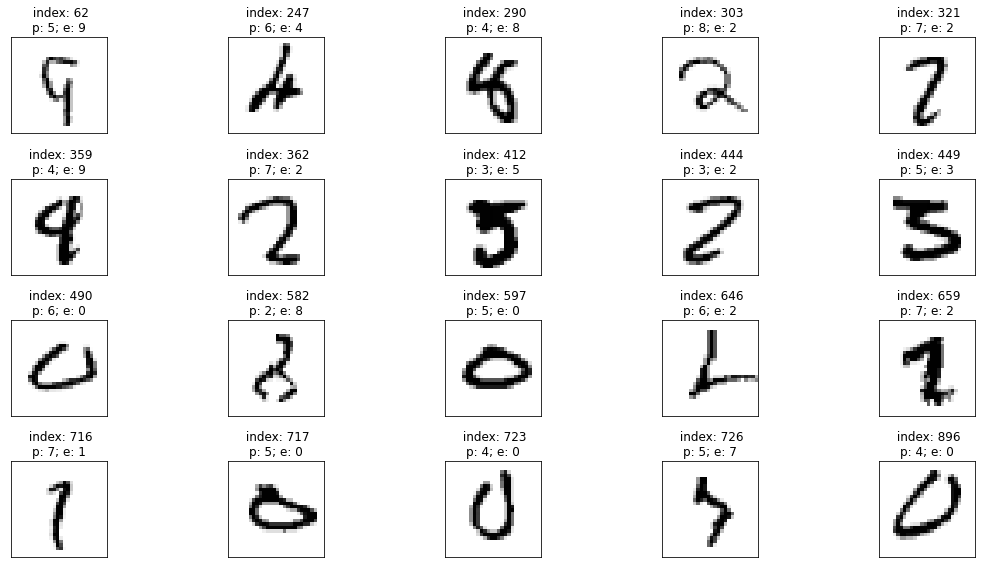

In [17]:
images = X_test.reshape((10000, 28, 28))
errors = []
correct = []

for i, (p, e) in enumerate(zip(predictor, y_test)):
    predicted, expected = argmax(p), argmax(e)
    
    if predicted != expected:
        errors.append((i, images[i], predicted, expected))
    else:
        correct.append((i, images[i], predicted, expected))
        
print("Number of Errors: ", len(errors))

# Displaying Incorrect Predictions
fig2, axes2 = plt.subplots(nrows=4, ncols=5, figsize=(16,8))

for axes2, item2 in zip(axes2.ravel(), errors):
    index2, image2, predicted, expected = item2
    axes2.imshow(image2, cmap=plt.cm.gray_r)
    axes2.set_xticks([]) # removes x ticks
    axes2.set_yticks([]) # removes y ticks
    axes2.set_title(f' index: {index2}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [84]:
#### Displaying Probabilities Errors
def displayProbs(prediction):
    for i, p in enumerate(prediction):
        print(f'{i}: {p:.10%}')

displayProbs(predictor[247])

0: 0.3958093934%
1: 0.0374277239%
2: 5.8435086161%
3: 0.0268470118%
4: 31.3780367374%
5: 0.0564291724%
6: 58.3711206913%
7: 0.0059883816%
8: 3.8785494864%
9: 0.0062791230%


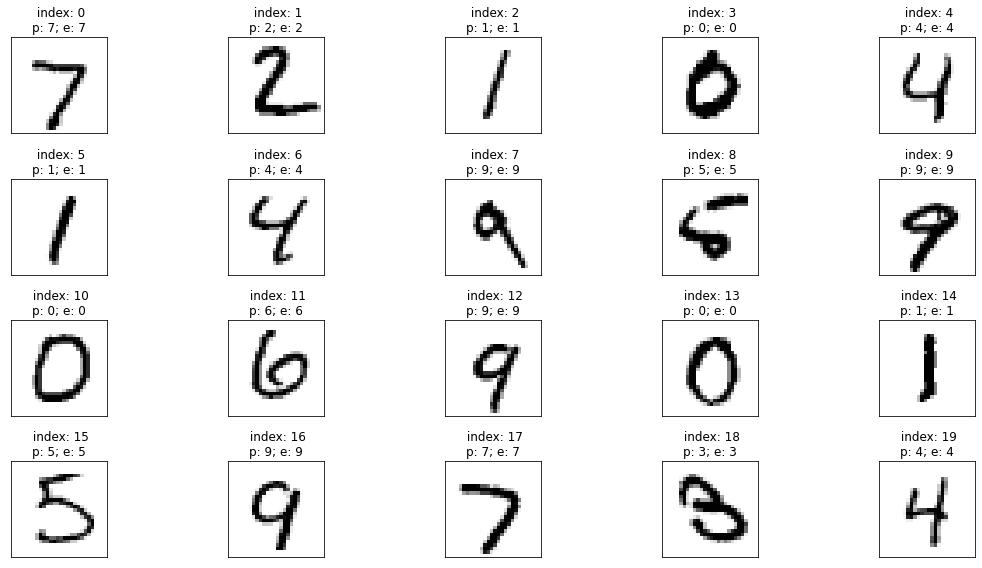

In [19]:
# Displaying Correct Predictions
fig3, axes3 = plt.subplots(nrows=4, ncols=5, figsize=(16,8))

for axes3, item3 in zip(axes3.ravel(), correct):
    index3, image3, predicted, expected = item3
    axes3.imshow(image3, cmap=plt.cm.gray_r)
    axes3.set_xticks([]) # removes x ticks
    axes3.set_yticks([]) # removes y ticks
    axes3.set_title(f' index: {index3}\np: {predicted}; e: {expected}')
plt.tight_layout()

---
---
## Conclusion

<br>
<font size="3">
As we can see, our CNN is well over 95% accurate in predicting the images in the MNIST dataset.
</font>
---
### For more information regarding Convolutional Neural Networks (CNNs), please see:

<font size="3">
<br>
    
+ [Convolutional Neural Network at Stanford](http://deeplearning.stanford.edu/tutorial/supervised/ConvolutionalNeuralNetwork/)
<br>
    
+ [Convolutional neural network on Wiki](https://en.wikipedia.org/wiki/Convolutional_neural_network)
<br>
    
+ [A Comprehensive Guide to Convolutional Neural Networks](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)
<br>
    
+ [How Do Convolutional Layers Work in Deep Learning Neural Networks?](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)
<br>
    
+ [Convolutional Neural Network on Science Direct](https://www.sciencedirect.com/topics/engineering/convolutional-neural-network)
<br>
    
+ [Understanding of Convolutional Neural Network (CNN) — Deep Learning](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)

</font>

---